In [1]:
import pandas as pd

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\python\\data.csv', encoding='UTF-8')
data.head(5)

,年別,戶外,評分,細分,分類,縣市別,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,合計
0,2020,1,4.2,鶯歌老街,1,新北市,65686,78398,57664,65141,88066,78413,77386,88000,88769,85520,85520,65666,924229
1,2020,1,4.2,三峽老街,1,新北市,300000,182000,84000,63000,71000,95000,127000,144000,150000,146000,128000,131000,1621000
2,2020,1,4.3,八里左岸公園,2,新北市,263000,294000,281900,222000,289000,321300,272000,340200,281880,411480,354240,316440,3647440
3,2020,1,4.3,淡水紅毛城,2,新北市,78656,31972,8639,0,8953,14699,16060,17512,14026,29290,29882,22452,272141
4,2020,1,4.3,滬尾砲臺,3,新北市,7152,5933,2906,0,2905,3472,3485,4966,3306,7034,7158,4246,52563


In [3]:
features = data[['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月','評分','戶外','分類']]


# 將資料集標準化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 定義KNN模型，n_neighbors為鄰近數
model = NearestNeighbors(n_neighbors=3)
model.fit(features_scaled)

def recommend_places(month, is_outdoor, rating,classify,much):
    
    
    target_features = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,rating,is_outdoor,classify]
    month-=1
    if much==1:
        target_features[month] = 100000
    else:
        target_features[month] = 10000
    # 特徵值進行標準化
    target_features_scaled = scaler.transform([target_features])
    
    distances, indices = model.kneighbors(target_features_scaled)
    # 推薦的景點
    #print(indices,"\n")
    print('推薦的旅遊景點：')

    for i in indices[0]:
        
        print("第%d項 :"%(i),end="")
        print(data.iloc[i]['細分'])

mon=eval(input("請輸入月份:"))

s=input("請輸入是否希望戶外: Y/N")
if(s=='y'or s=='Y'):
    s='是'
    out=1
else:
    s='否'
    out=0
    

rat=eval(input("請輸入評分:"))
classify=eval(input("請輸入景點類型1~3 (1)平地 (2)海邊 (3)上山 :"))
much=eval(input("可否接受人多: (0)否 (1)是"))
print("在%d月份，是否希望戶外:%s，第%d類景點 評分為%.1f的情況下"%(mon,s,classify,rat))
recommend_places(mon,out,rat,classify,much)


在5月份，是否希望戶外:否，第2類景點 評分為4.0的情況下
推薦的旅遊景點：
第5項 :前清淡水關稅務司官邸
第26項 :野柳海洋世界
第13項 :水湳洞遊客中心


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


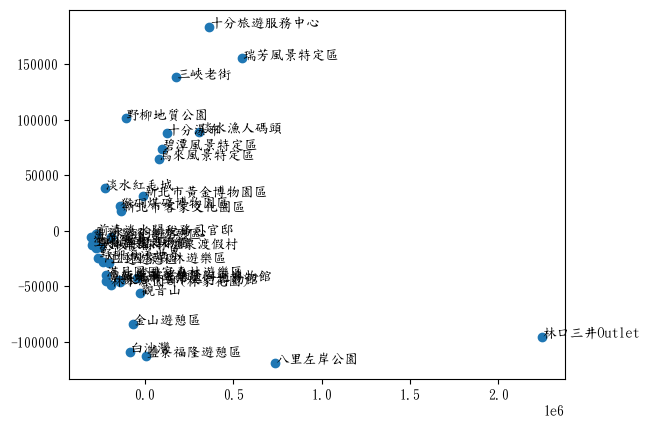

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# 設定PCA模型，降至二維
pca = PCA(n_components=2)

# 將特徵向量降維至二維
features_pca = pca.fit_transform(features)

# 設定標楷字體
plt.rcParams['font.sans-serif'] = ['DFKai-SB'] 
plt.rcParams['axes.unicode_minus'] = False

# 取出每個景點的x, y坐標
x_coords = features_pca[:, 0]
y_coords = features_pca[:, 1]


# 繪製散點圖
plt.scatter(x_coords, y_coords)
names = data['細分']
# 將每個點的名稱標示出來
for i, name in enumerate(names):
    plt.annotate(name, (x_coords[i], y_coords[i]))
    
# 顯示圖形
plt.show()